# I. Lý thuyết

1) Mạng tích chập CNN sẽ được thực hiện như thế nào?

A. Phân chia feature map thành các ma trận theo chiều channel và thực hiện tích chập giữa mỗi ma trận kernel với từng chiều.

B. Thực hiện phép nhân ma trận kernel với chuyển vị của ma trận local receptive field để thu được giá trị feature map output.

C. Tính trung bình các phân tử trên một ma trận local receptive field.

D. Di chuyển vùng local receptive field theo chiều từ trái sang phải và từ trên xuống dưới và nhân tích chập với kernel để thu được ma trận feature map.

=> Đáp án D

2) Thực hiện phép nhân tích chập giữa ma trận đầu vào kích thước width và height lần lượt là $(W, H)$ với bộ lọc kích thước $(F, F)$ và bước nhảy $S$ thì thu được ma trận đầu ra với kích thước width và height $(W', H')$ là bao nhiêu? Hãy lựa chọn công thức tổng quát nhất.

A. $W' =⌊ \frac{W-F}{S} ⌋ + 1;~ H' =⌊ \frac{H-F}{S} ⌋ + 1$

B. $W' =\lceil \frac{W-F}{S} \rceil + 1;~ H' = \lceil \frac{H-F}{S} \rceil + 1$ 

C. $W' =\lfloor \frac{W-F+2P}{S} \rfloor + 1;~ H' = \lfloor \frac{H-F+2P}{S} \rfloor + 1$ với $P$ là số lượng các véc tơ 0 padding ở bên ngoài đều hai phía.

D. $W' =\lceil \frac{W-F+P}{S} \rceil + 1;~ H' = \lceil \frac{H-F+P}{S} \rceil + 1$ với $P$ là số lượng các véc tơ 0 padding ở bên ngoài đều hai phía.

=> Đáp án C

3) Mạng CNN sẽ học được những gì qua các layers?

A. Tại những layers đầu mỗi channels sẽ giúp phân biệt một loại đặc trưng, của vật thể. Những đặc trưng này sau đó được trải phẳng và đưa vào mạng MLP để phân loại vật thể.

B. Những layers cuối cùng sẽ zoom vào từng chi tiết của vật thể để phân loại vật thể.

C. Tại những layers đầu mạng sẽ học được các đặc trưng chung như các edge dọc, ngang, chéo,.... Các đặc trưng chi tiết và tổng quát giúp nhận diện vật thể được học tại những layers cuối cùng.

D. Các layers đầu tiên sẽ tập trung vào các chi tiết bộ phận của vật thể.

=> Đáp án C

4) Kiến trúc chung của một mạng CNN là gì?

A. _[Conv -> BatchNorm -> Activation -> Maxpooling] x n_

B. _[BatchNorm -> Conv -> Activation -> Maxpooling] x n_ 

C. _[Conv -> BatchNorm -> Maxpooling -> Activation -> Maxpooling] x n_ 

D. _[Conv -> BatchNorm -> Maxpooling -> Activation -> Maxpooling] x n -> Flatten -> [FullyConnected -> Activation] x m -> Softmax_ 

=> Đáp án D

5) Thông thường đặc điểm kích thước feature map của mạng neural sẽ như thế nào ?

A. Kích thước feature map tăng dần gấp đôi qua thời gian.

B. Kích thước feature map sẽ duy trì không đổi qua thời gian.

C. Kích thước mạng sẽ giảm dần gấp đôi sau mỗi một lần downsampling và sau đó tăng dần gấp đôi sau mỗi lần upsampling để khôi phục về kích thước ảnh input.

D. Kích thước mạng thường giảm gấp đôi sau một lần downsampling và số lượng các filters tăng dần.

=> Đáp án D

# II. Thực hành

6) Thực hiện xây dựng và huấn luyện một mạng CNN ngẫu nhiên trên bộ dữ liệu [Dog and Cat](https://www.kaggle.com/c/dog-vs-cat-classification/data). Lưu ý cần thực hiện [chuẩn hóa dữ liệu](https://github.com/pytorch/examples/issues/112) đối với bộ dữ liệu ImageNet trước khi huấn luyện.

7) Grid Search kiến trúc CNN dựa trên việc tổng quát hóa một thiết kế câu 6.

8) Huấn luyện lại mô hình bằng kiến trúc ResNet và MobileNet. Đánh giá chi phí tính toán và submit kết quả độ chính xác trên các ảnh thuộc folder test.

9) Thử nghiệm các phương pháp Augmentation như Flip, Rotation, Random Crop, Bright Contrast để cải thiện kết quả mô hình.

10) Lập bảng kết quả các thử nghiệm đã sử dụng.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
!unzip /content/drive/MyDrive/dog-vs-cat-classification.zip

In [ ]:
import os
cat_dir_list = os.listdir('/content/drive/MyDrive/train/train/cats')
dog_dir_list = os.listdir('/content/drive/MyDrive/train/train/dogs')
test_dir_list = os.listdir('/content/drive/MyDrive/test/test')
print('The number of cat images: ', len(cat_dir_list))
print('The number of dog images: ', len(dog_dir_list))
print('The number of test images: ', len(test_dir_list))

The number of cat images:  12500
The number of dog images:  12500
The number of test images:  8000


2 classes:
['cats', 'dogs']


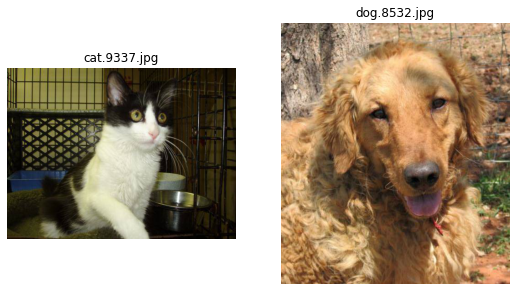

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
%matplotlib inline

# The images are in the data/shapes folder
data_folder = '/content/drive/MyDrive/train/train'

# Get the class names
classes = os.listdir(data_folder)
print(len(classes), 'classes:')
print(classes)

# Show the first image in each folder
fig = plt.figure(figsize=(9, 14))
i = 0
for sub_dir in classes:
    i+=1
    img_file = os.listdir(os.path.join(data_folder,sub_dir))[99]
    img_path = os.path.join(data_folder, sub_dir, img_file)
    img = mpimg.imread(img_path)
    a = fig.add_subplot(2, len(classes),i)
    a.axis('off')
    imgplot = plt.imshow(img)
    a.set_title(img_file)
plt.show()

## 6/9.Thực hiện huấn luyện mô hình CNN ngẫu nhiên và sử dụng Augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = (128, 128)
batch_size = 32

print("Getting Data...")
datagen = ImageDataGenerator(rescale=1./255, # normalize pixel values
                             validation_split=0.3, # hold back 30% of the images for validation
                             rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,
                             zoom_range=0.2,shear_range=0.2)

print("Preparing training dataset...")
train_generator = datagen.flow_from_directory(
    data_folder,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training') # set as training data

print("Preparing validation dataset...")
validation_generator = datagen.flow_from_directory(
    data_folder,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation') # set as validation data

classnames = list(train_generator.class_indices.keys())
print('Data generators ready')

Getting Data...
Preparing training dataset...
Found 17500 images belonging to 2 classes.
Preparing validation dataset...
Found 7500 images belonging to 2 classes.
Data generators ready


In [ ]:
# Define a CNN classifier network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Define the model as a sequence of layers
model = Sequential()
model.add(Conv2D(32, (6, 6), input_shape=train_generator.image_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (6, 6), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (6, 6), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, (6, 6), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
# Generate a fully-connected output layer with a predicted probability for each class
# (softmax ensures all probabilities sum to 1)
model.add(Dense(train_generator.num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 123, 123, 32)      3488      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 61, 61, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 56, 56, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 28, 28, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 23, 23, 128)       295040    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 11, 11, 128)      0

In [ ]:
# Train the model over 20 epochs using 32-image batches with 100 steps per epoch to save time and using the validation holdout dataset for validation
num_epochs = 20
history1 = model.fit(
    train_generator,
    steps_per_epoch = 100,
    validation_data = validation_generator, 
    validation_steps = 50,
    epochs = num_epochs)

Epoch 1/20
100/100 [==============================] - 37s 371ms/step - loss: 0.6930 - accuracy: 0.5053 - val_loss: 0.6926 - val_accuracy: 0.5044
Epoch 2/20
100/100 [==============================] - 36s 366ms/step - loss: 0.7099 - accuracy: 0.5078 - val_loss: 0.6931 - val_accuracy: 0.5244
Epoch 3/20
100/100 [==============================] - 37s 372ms/step - loss: 0.6933 - accuracy: 0.5019 - val_loss: 0.6932 - val_accuracy: 0.4881
Epoch 4/20
100/100 [==============================] - 37s 367ms/step - loss: 0.6932 - accuracy: 0.5019 - val_loss: 0.6932 - val_accuracy: 0.4975
Epoch 5/20
100/100 [==============================] - 36s 366ms/step - loss: 0.6934 - accuracy: 0.4966 - val_loss: 0.6929 - val_accuracy: 0.5113
Epoch 6/20
100/100 [==============================] - 36s 363ms/step - loss: 0.6933 - accuracy: 0.4963 - val_loss: 0.6932 - val_accuracy: 0.4956
Epoch 7/20
100/100 [==============================] - 36s 363ms/step - loss: 0.6930 - accuracy: 0.5119 - val_loss: 0.6932 - val_ac

## 7.Grid Search CNN using Keras Tuner


In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
!pip install -q -U keras-tuner

     |████████████████████████████████| 98 kB 5.4 MB/s 


In [ ]:
import keras_tuner as kt

In [ ]:
def model_builder(hp):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(128, 128)))

  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 32-512
  hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
  model.add(keras.layers.Dense(units=hp_units, activation='relu'))
  model.add(keras.layers.Dense(2))

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

  return model

In [ ]:
#Using Hyperband tuner to instantiate the tuner and perform hypertuning
tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs = 50,
                     factor=3,
                     directory='my_dir',
                     project_name='intro_to_kt')

In [ ]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [ ]:
tuner.search(train_generator, validation_generator , epochs=50, callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")


Search: Running Trial #1

Hyperparameter    |Value             |Best Value So Far 
units             |192               |?                 
learning_rate     |0.001             |?                 
tuner/epochs      |2                 |?                 
tuner/initial_e...|0                 |?                 
tuner/bracket     |3                 |?                 
tuner/round       |0                 |?                 



ValueError: ignored

## 8a.Huấn luyện model bằng Resnet


In [ ]:
strategy = tf.distribute.MirroredStrategy()
print('Number of devices: {}'.format(strategy.num_replicas_in_sync))

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
Number of devices: 1


In [ ]:
with strategy.scope():
  resnet_model = Sequential()
  pretrained_model = tf.keras.applications.ResNet50(input_shape=(128,128,3),
                                include_top=False,pooling='avg',
                                classes=2,weights='imagenet')
  # Đóng băng các lớp layers để ko train nữa
  for layer in pretrained_model.layers:
    layer.trainable=False
# => Trainable params = 0
  resnet_model.add(pretrained_model)
  resnet_model.add(Flatten())
  resnet_model.add(Dense(256,'relu'))
  resnet_model.add(Dense(2,'softmax'))
  resnet_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])

INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Redu

In [ ]:
epochs= 20
history = resnet_model.fit(train_generator,
                        steps_per_epoch = 100,
                        validation_data = validation_generator, 
                        validation_steps = 50,
                        epochs = epochs)

Epoch 1/20
100/100 [==============================] - 921s 9s/step - loss: 0.6968 - acc: 0.5288 - val_loss: 0.6911 - val_acc: 0.5356
Epoch 2/20
100/100 [==============================] - 762s 8s/step - loss: 0.6872 - acc: 0.5544 - val_loss: 0.6666 - val_acc: 0.6000
Epoch 3/20
100/100 [==============================] - 643s 6s/step - loss: 0.6884 - acc: 0.5606 - val_loss: 0.6731 - val_acc: 0.5794
Epoch 4/20
100/100 [==============================] - 488s 5s/step - loss: 0.6915 - acc: 0.5509 - val_loss: 0.6593 - val_acc: 0.6231
Epoch 5/20
100/100 [==============================] - 388s 4s/step - loss: 0.6698 - acc: 0.5738 - val_loss: 0.6855 - val_acc: 0.5569
Epoch 6/20
100/100 [==============================] - 308s 3s/step - loss: 0.6695 - acc: 0.5819 - val_loss: 0.6796 - val_acc: 0.5575
Epoch 7/20
100/100 [==============================] - 263s 3s/step - loss: 0.6663 - acc: 0.5875 - val_loss: 0.6658 - val_acc: 0.6019
Epoch 8/20
100/100 [==============================] - 199s 2s/step - 

## 8b.Huấn luyện model bằng MobileNet


In [ ]:
strategy = tf.distribute.MirroredStrategy()
print('Number of devices: {}'.format(strategy.num_replicas_in_sync))

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
Number of devices: 1


In [ ]:
with strategy.scope():
  mobilenet_model = Sequential()
  pretrained_model = tf.keras.applications.MobileNetV2(input_shape=(128,128,3),
                                include_top=False,pooling='avg',
                                classes=2,weights='imagenet')
  # Đóng băng các lớp layers để ko train nữa
  for layer in pretrained_model.layers:
    layer.trainable=False
# => Trainable params = 0
  mobilenet_model.add(pretrained_model)
  mobilenet_model.add(Flatten())
  mobilenet_model.add(Dense(256,'relu'))
  mobilenet_model.add(Dense(2,'softmax'))
  mobilenet_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])

In [ ]:
epochs= 20
history = mobilenet_model.fit(train_generator,
                        steps_per_epoch = 100,
                        validation_data = validation_generator, 
                        validation_steps = 50,
                        epochs = epochs)

Epoch 1/20
100/100 [==============================] - 62s 625ms/step - loss: 0.1576 - acc: 0.9327 - val_loss: 0.1762 - val_acc: 0.9235
Epoch 2/20
100/100 [==============================] - 64s 639ms/step - loss: 0.1682 - acc: 0.9309 - val_loss: 0.1505 - val_acc: 0.9371
Epoch 3/20
100/100 [==============================] - 61s 611ms/step - loss: 0.1601 - acc: 0.9341 - val_loss: 0.1624 - val_acc: 0.9337
Epoch 4/20
100/100 [==============================] - 65s 657ms/step - loss: 0.1649 - acc: 0.9284 - val_loss: 0.1442 - val_acc: 0.9400
Epoch 5/20
100/100 [==============================] - 61s 618ms/step - loss: 0.1441 - acc: 0.9372 - val_loss: 0.1561 - val_acc: 0.9331
Epoch 6/20
100/100 [==============================] - 62s 620ms/step - loss: 0.1547 - acc: 0.9319 - val_loss: 0.1550 - val_acc: 0.9371
Epoch 7/20
100/100 [==============================] - 60s 608ms/step - loss: 0.1482 - acc: 0.9344 - val_loss: 0.1528 - val_acc: 0.9377
Epoch 8/20
100/100 [==============================] - 5

### => Train model CNN sử dụng pretrained tốn ít tài nguyên hơn và có độ chính xác cao hơn